In [1]:
import mnistutils # custom library

In [2]:
filenames = mnistutils.mnist_download("data")
print(filenames)

{'train_images': 'train-images-idx3-ubyte', 'train_labels': 'train-labels-idx1-ubyte', 'validation_images': 't10k-images-idx3-ubyte', 'validation_labels': 't10k-labels-idx1-ubyte'}


In [38]:
training_data = list(mnistutils.read(dataset="training", path="data"))
print(len(training_data))
testing_data = list(mnistutils.read(dataset="testing", path="data"))
print(len(testing_data))

60000
10000


5
(28, 28)


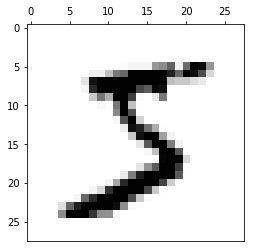

In [107]:
# printing fisrt element of dataset
label, pixels = training_data[0]
print(label)
print(pixels.shape)
mnistutils.show(pixels)

3


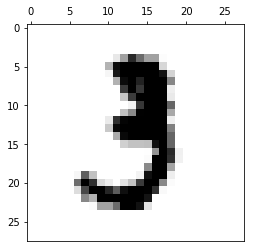

7


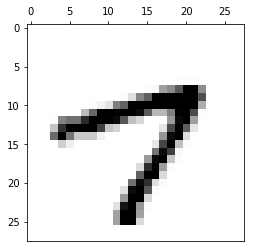

In [14]:
# printing another two elements
print(training_data[10][0])
mnistutils.show(training_data[10][1])
print(training_data[101][0])
mnistutils.show(training_data[101][1])

In [114]:
import numpy as np

num_classes = 10

# Preparing training and validation data
train_images = []
train_labels = []

for i in range(0, len(training_data)):
    train_images.append(training_data[i][1])
    train_labels.append(training_data[i][0])

# convert list to array
train_images = np.asarray(train_images);
train_labels = np.asarray(train_labels);

# reshaping so we can match model's input size
train_images = train_images.reshape(60000, 784)
train_images = train_images.astype('float32') / 255
train_labels = keras.utils.to_categorical(train_labels, num_classes)

print(train_images.shape)
print(train_labels.shape)

validation_images = []
validation_labels = []

for i in range(0, len(testing_data)):
    validation_images.append(testing_data[i][1])
    validation_labels.append(testing_data[i][0])

# convert list to array
validation_images = np.asarray(validation_images);
validation_labels = np.asarray(validation_labels);

# reshaping so we can match model's input size
validation_images = validation_images.reshape(10000, 784)
validation_images = validation_images.astype('float32') / 255
validation_labels = keras.utils.to_categorical(validation_labels, num_classes)

print(validation_images.shape)
print(validation_labels.shape)

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


dense_100 (None, 784) ==> (None, 512)
dense_101 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_100 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_101 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 75us/step - loss: 0.3823 - acc: 0.8888 - val_loss: 0.3112 - val_acc: 0.9115
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3090 - acc: 0.9142 - val_loss: 0.3074 - val_acc: 0.9099
Epoch 3/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2961 - acc: 0.9181 - val_loss: 0.2981 - val_acc: 0.9195

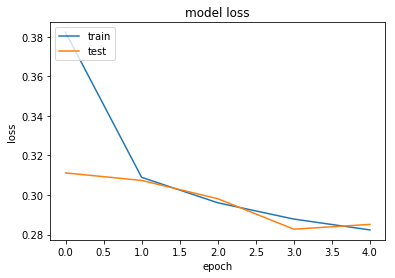

In [119]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
from numpy.random import seed

seed(1)

model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

model.summary()

# Case 1 - No Activation Function
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images, validation_labels)
                   )

score = model.evaluate(validation_images, validation_labels, verbose=100)


print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_106 (None, 784) ==> (None, 512)
dense_107 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_106 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_107 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 79us/step - loss: 0.4239 - acc: 0.8837 - val_loss: 0.2741 - val_acc: 0.9186
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.2352 - acc: 0.9312 - val_loss: 0.2053 - val_acc: 0.9357
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1787 - acc: 0.9481 - val_loss: 0.1641 - val_acc: 0.9493

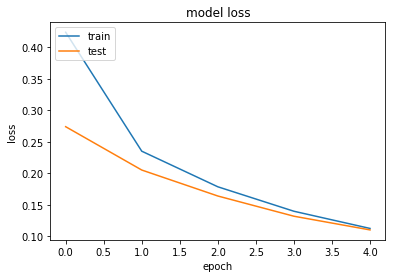

In [122]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

from numpy.random import seed

seed(1)

model = Sequential()
model.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

model.summary()

# Case 1 - No Activation Function
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images, validation_labels)
                   )

score = model.evaluate(validation_images, validation_labels, verbose=100)


print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_108 (None, 784) ==> (None, 512)
dense_109 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_108 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_109 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 80us/step - loss: 0.3333 - acc: 0.9020 - val_loss: 0.2224 - val_acc: 0.9334
Epoch 2/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1750 - acc: 0.9490 - val_loss: 0.1419 - val_acc: 0.9565
Epoch 3/5
60000/60000 [==============================] - 3s 51us/step - loss: 0.1169 - acc: 0.9659 - val_loss: 0.1189 - val_acc: 0.9648

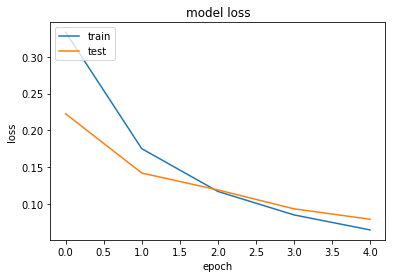

In [123]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

from numpy.random import seed

seed(1)

model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

model.summary()

# Case 1 - No Activation Function
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images, validation_labels)
                   )

score = model.evaluate(validation_images, validation_labels, verbose=100)


print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')


dense_110 (None, 784) ==> (None, 512)
dense_111 (None, 512) ==> (None, 10)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_110 (Dense)            (None, 512)               401920    
_________________________________________________________________
dense_111 (Dense)            (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 84us/step - loss: 0.2565 - acc: 0.9252 - val_loss: 0.1431 - val_acc: 0.9568
Epoch 2/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.1040 - acc: 0.9694 - val_loss: 0.0850 - val_acc: 0.9735
Epoch 3/5
60000/60000 [==============================] - 3s 52us/step - loss: 0.0685 - acc: 0.9794 - val_loss: 0.0803 - val_acc: 0.9743

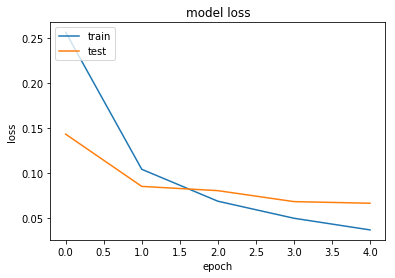

In [124]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout

from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

from numpy.random import seed

seed(1)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

for l in model.layers:
    print (l.name, l.input_shape,'==>',l.output_shape)

model.summary()

# Case 1 - No Activation Function
batch_size = 128
epochs = 5

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_images, validation_labels)
                   )

score = model.evaluate(validation_images, validation_labels, verbose=100)


print('Test loss:', round(score[0], 3))
print('Test accuracy:', round(score[1], 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
